**Problem to solve :** predict the life expectancy in Morocco based on features such as the country's GDP, fertility rate, and population. 

# Importing the data :

In [6]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder_tidy.csv')

df.head()

,Year,Country,fertility,life,population,child_mortality,gdp,region
0,1964,Afghanistan,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,1965,Afghanistan,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,1966,Afghanistan,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,1967,Afghanistan,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,1968,Afghanistan,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [7]:
# Create arrays for features and target variable
y = df[df['Country']=='Morocco']['life'].values
X = df[df['Country']=='Morocco']['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y_reshaped = y.reshape(-1,1)
X_reshaped = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y_reshaped.shape))
print("Dimensions of X after reshaping: {}".format(X_reshaped.shape))

Dimensions of y before reshaping: (50,)
Dimensions of X before reshaping: (50,)
Dimensions of y after reshaping: (50, 1)
Dimensions of X after reshaping: (50, 1)


# Exploring the Gapminder data : 

We minimize the sum of the squares of the residuals because if it's not so : a large positive residual will cancel a large negative residual. 

-Ordinary least squares(OLS): minimize the sum of the squares of the residuals, when calling linear_model.LinearRegression().fit() it preforms the OLS under the hood 


Cells that are in green show positive correlation, while cells that are in red show negative correlation
life and fertility are negatively correlated.


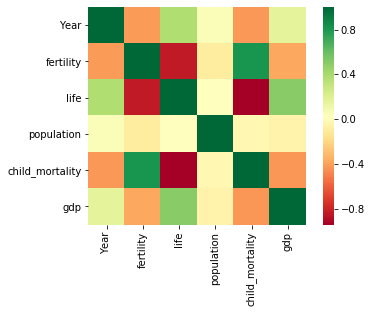

In [8]:
# correlation heat map:
heat_map = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

print('Cells that are in green show positive correlation, while cells that are in red show negative correlation')
print('life and fertility are negatively correlated.')

# Fitting a Linear Regression and R^2 into Morocco's data
## Linear Regression using one feature 'fertility' as predictor to the target 'life_expectancy' 
## Linear regression without train/test split data : 

R^2 : 0.9819549422579886


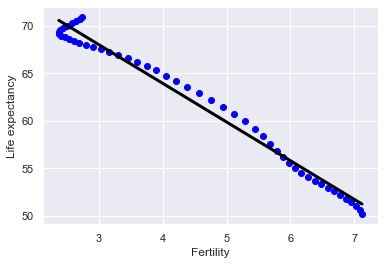

Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!


In [10]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space x
prediction_space = np.linspace(min(X_reshaped), max(X_reshaped)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_reshaped, y_reshaped)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# # Print R^2 
print('R^2 :',reg.score(X_reshaped, y_reshaped))

# Plot regression line_
sns.set()
_= plt.scatter(X_reshaped, y_reshaped, color = 'blue')
_= plt.xlabel('Fertility')
_= plt.ylabel('Life expectancy')
_= plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

print("Notice how the line captures the underlying trend in the data. And the performance is quite decent for this basic regression model with only one feature!")

## Linear Regression: train/test split data for regression 

Train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data.

In [4]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 
print("R^2: {}".format(reg_all.score(X_test, y_test)))

# Compute  RMSE (model performance metrics)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.9829446831304058
Root Mean Squared Error: 0.8842368610544521


## 5-fold cross-validation : 

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.
By default, scikit-learn's cross_val_score() function uses R2 as the metric of choice for regression. 

In [5]:
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_train, y_train, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
print("Now that you have cross-validated your model, you can more confidently evaluate its predictions.")

[0.98954461 0.98326296 0.98242215 0.95231695 0.96755794]
Average 5-Fold CV Score: 0.9750209200796054
Now that you have cross-validated your model, you can more confidently evaluate its predictions.


In [6]:
%timeit cross_val_score(reg, X_train, y_train, cv=5)

3.89 ms ± 40.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Regulazisation Regression : Lasso for features Selection 

## Regulazisation Regression using all features as predictors exept str features :

[ 0.00000000e+00 -2.28309259e-01  6.99572471e-08 -5.33185992e-02
  0.00000000e+00]


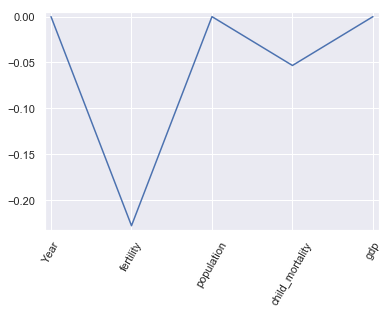

the important features are fertility and child mortality


In [10]:
# Import Lasso and feaures Selection for morroco's data
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize= True)

# Features
df = df.fillna(0)

# predictors features: droping target variables and string columns
predictors = df[df['Country']=='Morocco'].drop(labels=['life','Country', 'region'], axis=1)
target = df[df['Country']=='Morocco']['life'].values.reshape(-1,1)

names = predictors.columns

# Fit the regressor to the data
lasso.fit(predictors,target)

# Compute and print the coefficients
lasso_coeff = lasso.coef_
print(lasso_coeff)

# lasso_coeff = lasso.fit(predictors,target).coef_

# Plot the coefficients
plt.plot(range(len(names)), lasso_coeff)
plt.xticks(range(len(names)), names, rotation=60)
plt.margins(0.02)
plt.show()

print('the important features are fertility and child mortality')

# Regularization regression: Ridge using all features

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using this function that we have defined for you, which plots the R2 score as well as standard error for each alpha:



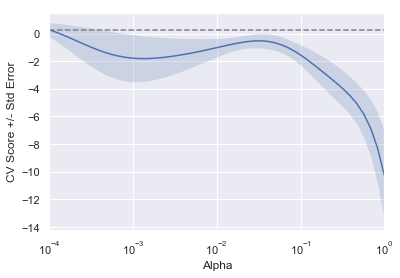

Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model?


In [50]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, predictors,target, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

print('Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model?')

# Regulazisation Regression : ElasticNet using all features

## hyperparameter tuning with GridSeachCV using ElasticNet() regularisation regressor()

Remember lasso and ridge regression from the previous chapter? Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties: **a∗L1+b∗L2**.  

That's why elastic net is always preferred over lasso & ridge regression because it solves the limitations of both methods, while also including each as special cases.  

In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.

In [49]:
# Hyperparameter tuning using ElasticNet() regressor : 
#Elastic net model with best model selection by cross-validation

# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# step 1 : Create train and test sets
X_trainx, X_testx, y_trainy, y_testy = train_test_split(predictors, target, test_size = 0.3, random_state=42)

#  Step 2 : hyperparameter Tuning(GridSearchCV) with cross validation
#  Creating the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Step 3 ; Fit it to the training data using the results of tuned hyperparameters 
gm_cv.fit(X_trainx, y_trainy)

# Predict on the test using the tuned hyperparameters 
y_pred_elastic = gm_cv.predict(X_testx)

#model performance metrics: compare y_predicted with actual/ test and evaluate score performance
r2 = gm_cv.score(X_testx, y_testy)
mse = mean_squared_error(y_testy, y_pred_elastic)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.9979024667298462
Tuned ElasticNet MSE: 0.09615819360665351


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

## Exploring categorical features and creating dummy variables()


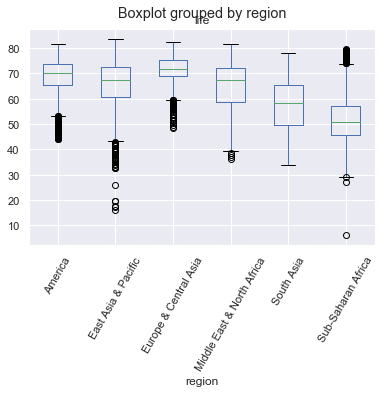

In [55]:
# droping coutry column and keeping region as a categorical var
df_df = df.drop('Country', axis=1)

# Create a boxplot of life expectancy per region
df_df.boxplot('life','region', rot=60)

# Show the plot
plt.show()

In [57]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df_df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: 
# df_region drop the unneeded dummy variable (in this case, 'Region_America')
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)


Index(['Year', 'fertility', 'life', 'population', 'child_mortality', 'gdp',
       'region_America', 'region_East Asia & Pacific',
       'region_Europe & Central Asia', 'region_Middle East & North Africa',
       'region_South Asia', 'region_Sub-Saharan Africa'],
      dtype='object')
Index(['Year', 'fertility', 'life', 'population', 'child_mortality', 'gdp',
       'Country_Aland', 'Country_Albania', 'Country_Algeria', 'Country_Angola',
       ...
       'Country_West Bank and Gaza', 'Country_Western Sahara',
       'Country_Yemen, Rep.', 'Country_Zambia', 'Country_Zimbabwe',
       'region_East Asia & Pacific', 'region_Europe & Central Asia',
       'region_Middle East & North Africa', 'region_South Asia',
       'region_Sub-Saharan Africa'],
      dtype='object', length=214)


In [59]:
# Linear regression using Ridge without tain/test split


# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# peredictors, target

pred = df_region.drop('life', axis= 1)
tar = df_region['life']

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha= 0.5, normalize = True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, pred, tar, cv= 5)

# Print the cross-validated scores
print(ridge_cv)

[0.75000808 0.8118158  0.7499401  0.79172358 0.73101253]


## Pipeline for regression :  imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data ( tune the l1_ratio of your ElasticNet using GridSearchCV.)

In [69]:
# Necessary import 

from sklearn.preprocessing import  Imputer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(pred,tar, test_size = 0.4, random_state =42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv= 3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.8764647754785291


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
